In [52]:
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

data_x, data_y = load_veterans_lung_cancer()
data_y.shape

(137,)

In [6]:
data_x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


## Use survival analysis for probability that blueberries are rotten

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"])


In [46]:
survival_prob

array([0.98540146, 0.97810219, 0.97080292, 0.96350365, 0.94160584,
       0.91240876, 0.89781022, 0.89051095, 0.87591241, 0.86131387,
       0.84671533, 0.83941606, 0.81751825, 0.80291971, 0.78832117,
       0.77372263, 0.76642336, 0.75182482, 0.72992701, 0.72255401,
       0.71518101, 0.70043501, 0.68568901, 0.67831601, 0.67094301,
       0.66357001, 0.65619701, 0.64882401, 0.64145101, 0.63407801,
       0.62670501, 0.61933201, 0.59721301, 0.57509401, 0.56772101,
       0.55297501, 0.54560201, 0.53822901, 0.53085601, 0.52348301,
       0.51611001, 0.50873701, 0.493991  , 0.486618  , 0.486618  ,
       0.47913157, 0.47164514, 0.46403796, 0.45643078, 0.44121642,
       0.44121642, 0.42573515, 0.41799451, 0.41010782, 0.40206649,
       0.39402516, 0.3779425 , 0.36990117, 0.35381851, 0.34577718,
       0.33773585, 0.33773585, 0.32949839, 0.32126093, 0.31302347,
       0.30478601, 0.29654855, 0.28831109, 0.28007363, 0.27183617,
       0.26359871, 0.25536125, 0.23888633, 0.23064887, 0.22241

In [45]:
time

array([  1.,   2.,   3.,   4.,   7.,   8.,  10.,  11.,  12.,  13.,  15.,
        16.,  18.,  19.,  20.,  21.,  22.,  24.,  25.,  27.,  29.,  30.,
        31.,  33.,  35.,  36.,  42.,  43.,  44.,  45.,  48.,  49.,  51.,
        52.,  53.,  54.,  56.,  59.,  61.,  63.,  72.,  73.,  80.,  82.,
        83.,  84.,  87.,  90.,  92.,  95.,  97.,  99., 100., 103., 105.,
       110., 111., 112., 117., 118., 122., 123., 126., 132., 133., 139.,
       140., 143., 144., 151., 153., 156., 162., 164., 177., 182., 186.,
       200., 201., 216., 228., 231., 242., 250., 260., 278., 283., 287.,
       314., 340., 357., 378., 384., 389., 392., 411., 467., 553., 587.,
       991., 999.])

Text(0.5, 0, 'Time (days)')

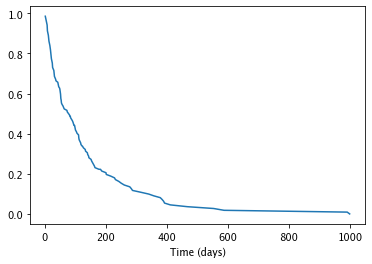

In [32]:
plt.plot(time, survival_prob)
plt.xlabel("Time (days)")

### Fit an exponential curve with scipy

In [47]:
# it exponential function

In [57]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [62]:
popt, pcov = curve_fit(func, time, survival_prob)

/var/folders/x5/9n_cfc0n0hsd7_d_7z0v03c1mn6n9j/T/ipykernel_39689/411350017.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


In [65]:
popt # best params for a,b,c

array([0.90965153, 0.00923347, 0.04437171])

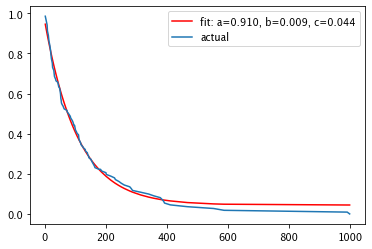

In [73]:
plt.plot(time, func(time, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(time, survival_prob, label='actual')
plt.legend()

In [93]:
age_in_days = 100
print(f"Your survival probability given {age_in_days} days old is {func(age_in_days, *popt)*100:.3}%")

Your survival probability given 100 days old is 40.6%


In [94]:
age_in_days = 200
print(f"Your survival probability given {age_in_days} days old is {func(age_in_days, *popt)*100:.3}%")

Your survival probability given 200 days old is 18.8%


- use this for fresh produce life

In [22]:
data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


In [27]:
data_x_numeric

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0
...,...,...,...,...,...,...,...,...
132,65.0,1.0,0.0,0.0,75.0,1.0,0.0,1.0
133,64.0,1.0,0.0,0.0,60.0,5.0,0.0,1.0
134,67.0,1.0,0.0,0.0,70.0,18.0,1.0,1.0
135,65.0,1.0,0.0,0.0,80.0,4.0,0.0,1.0


In [23]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

In [26]:
pd.Series(estimator.coef_, index=data_x_numeric.columns)


Age_in_years            -0.008549
Celltype=large          -0.788672
Celltype=smallcell      -0.331813
Celltype=squamous       -1.188299
Karnofsky_score         -0.032622
Months_from_Diagnosis   -0.000092
Prior_therapy=yes        0.072327
Treatment=test           0.289936
dtype: float64

In [31]:
estimator.predict(data_x_numeric)

array([-3.73615667, -3.94711619, -3.47075653, -3.61271759, -3.95621763,
       -2.26011545, -3.01167176, -4.38206565, -3.18866649, -4.07083127,
       -3.83847374, -2.9647913 , -2.70593256, -4.1711083 , -3.81087742,
       -2.81090662, -2.64901958, -1.93609523, -3.4082053 , -2.7682515 ,
       -2.1071757 , -2.86238716, -2.75669095, -1.86636075, -3.33509963,
       -1.69162514, -2.55391284, -2.87084458, -3.23795284, -2.03475717,
       -1.34470285, -3.48889726, -1.86663676, -3.33443009, -3.08573526,
       -2.78335124, -1.82379764, -2.86201915, -3.39724564, -2.81991605,
       -3.18823634, -2.5791011 , -2.37428294, -2.21841021, -2.13928228,
       -1.10337071, -2.79740573, -1.83548501, -2.93479958, -3.03766867,
       -2.09774108, -3.1573606 , -1.34655278, -2.90078589, -2.91316491,
       -3.92893329, -2.86570751, -3.47419874, -3.28569235, -2.60367856,
       -3.78359309, -3.67771287, -3.63663779, -4.25487447, -4.23832763,
       -3.96368299, -3.72374712, -3.45372076, -2.9911728 , -4.22